## SI 670 Applied Machine Learning, Week 1:  A simple classification task (Due 09/14 11:59pm)

For this assignment, you will be using the Breast Cancer Wisconsin (Diagnostic) Database to create a classifier that can help diagnose patients. First, read through the description of the dataset (below). Then, try out the first one or two questions, which use basic numpy to prepare the data, so you can get familiar with the various columns, etc. Then use k-NN classifiers to learn and make predictions.

Each question is worth 20 points, for a total of 100 points. Correct answers and code receive full credit, but partial credit will be awarded if you have the right idea even if your final answers aren't quite right.

Submit your completed notebook file to the Canvas site - IMPORTANT: please name your submitted file si670-hw1-youruniqname.ipynb.

As a reminder, the notebook code you submit must be your own work. Feel free to discuss general approaches to the homework with classmates: if you end up forming more of a team discussion on multiple questions, please include the names of the people you worked with at the top of your notebook file.

### Put your name here: Peilin Qiu
### Put your uniquename here: 88947734

In [14]:
# import required modules and load data file
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.DESCR)  # print the data set description

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

The object returned by `load_breast_cancer()` is a scikit-learn Bunch object, which is similar to a dictionary.

In [15]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [16]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

### Question 1

Scikit-learn works with lists, numpy arrays, scipy-sparse matrices, and pandas DataFrames, so converting the dataset to a DataFrame is not necessary for training this model. Using a DataFrame does however help make many things easier such as manipulating data, so let's practice creating a classifier with a pandas DataFrame. 



Convert the sklearn.dataset `cancer` to a DataFrame. 

* This function should return a `(569, 31)` DataFrame with columns =  



    ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension',
    'target']

and index = 

    RangeIndex(start=0, stop=569, step=1)

In [17]:
def answer_one():
    
    d = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))
    
    return pd.DataFrame(d)


answer_one()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [20]:
d = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))
d.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


### Question 2
Using `train_test_split`, split the dataset into training and test sets `(X_train, X_test, y_train, and y_test)`.

**Set the random number generator state to 670 using `random_state=670` to make sure your results match ours **

*This function should return a tuple of length 4:* `(X_train, X_test, y_train, y_test)`*, where* 
* `X_train` *has shape* `(450, 30)`
* `X_test` *has shape* `(119, 30)`
* `y_train` *has shape* `(450,)`
* `y_test` *has shape* `(119,)`

In [33]:
from sklearn.model_selection import train_test_split

def answer_two():
    df = answer_one()
    # Your code here
    
    X = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
            'mean smoothness', 'mean compactness', 'mean concavity',
            'mean concave points', 'mean symmetry', 'mean fractal dimension',
            'radius error', 'texture error', 'perimeter error', 'area error',
            'smoothness error', 'compactness error', 'concavity error',
            'concave points error', 'symmetry error', 'fractal dimension error',
            'worst radius', 'worst texture', 'worst perimeter', 'worst area',
            'worst smoothness', 'worst compactness', 'worst concavity',
            'worst concave points', 'worst symmetry', 'worst fractal dimension'
            ]]
    y = df['target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=450, random_state=670)

    return X_train, X_test, y_train, y_test


answer_two()

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 519       12.750         16.70           82.51      493.8          0.11250   
 289       11.370         18.89           72.17      396.0          0.08713   
 406       16.140         14.86          104.30      800.0          0.09495   
 272       21.750         20.99          147.30     1491.0          0.09401   
 525        8.571         13.10           54.53      221.3          0.10360   
 ..           ...           ...             ...        ...              ...   
 151        8.219         20.70           53.27      203.9          0.09405   
 528       13.940         13.17           90.31      594.2          0.12480   
 364       13.400         16.95           85.48      552.4          0.07937   
 409       12.270         17.92           78.41      466.1          0.08685   
 562       15.220         30.62          103.40      716.9          0.10480   
 
      mean compactness  mean concavity  mean conca

### Question 3
Using KNeighborsClassifier, fit a k-nearest neighbors (knn) classifier with `n_neighbors = 5` on `X_train`, `y_train`. Then evaluate the classifier accuracy using `score` function on `X_test` and `y_test`.

*This function should return a tuple of (knn, accuracy), where*
* `knn` is a `sklearn.neighbors.classification.KNeighborsClassifier`
* `accuracy` is a `float` number returned by the `score` function

In [36]:
from sklearn.neighbors import KNeighborsClassifier

def answer_three():
    X_train, X_test, y_train, y_test = answer_two()
    
    # Your code here
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    
    return (knn, accuracy)


answer_three()

(KNeighborsClassifier(), 0.9327731092436975)

### Question 4
Recall in the fruits example in lab1, we found the feature scales matter. In this question, please examine the mean and standard deviation of `X_train`, and use the `sklearn.preprocessing.StandardScaler` to normalize the feature. Then train another knn (k=5) classifier and evaluate it.

*This function should return a tuple of (standardized_X_train, knn, accuracy), where*
* `standardized_X_train` is a `pandas.DataFrame` of the standardized features
* `knn` is a `sklearn.neighbors.classification.KNeighborsClassifier`
* `accuracy` is a `float` number returned by the `score` function

In [45]:
from sklearn.preprocessing import StandardScaler

def answer_four(k=5):
    X_train, X_test, y_train, y_test = answer_two()
    
    # Your code here
    scaler = StandardScaler()

    columns = X_train.columns
    standardized_X_train = X_train.copy()
    standardized_X_test = X_test.copy()

    standardized_X_train[columns] = scaler.fit_transform(X_train[columns])
    standardized_X_test[columns] = scaler.transform(X_test[columns])

    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(standardized_X_train, y_train)
    accuracy = knn.score(standardized_X_test, y_test)
    
    return (standardized_X_train, knn, accuracy)  


answer_four()

(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 519    -0.350908     -0.594288       -0.351850  -0.426659         1.122326   
 289    -0.745705     -0.092213       -0.780961  -0.709641        -0.661551   
 406     0.618920     -1.016123        0.552437   0.459322        -0.111692   
 272     2.223855      0.389229        2.336941   2.458712        -0.177788   
 525    -1.546456     -1.419617       -1.513022  -1.215131         0.496528   
 ..           ...           ...             ...        ...              ...   
 151    -1.647158      0.322745       -1.565312  -1.265477        -0.174975   
 528    -0.010467     -1.403569       -0.028149  -0.136155         1.987193   
 364    -0.164953     -0.536973       -0.228594  -0.257102        -1.207191   
 409    -0.488228     -0.314593       -0.522000  -0.506809        -0.681239   
 562     0.355722      2.596985        0.515087   0.218875         0.580905   
 
      mean compactness  mean concavity  mean conca

### Question 5
Recall in the lecture and lab 1, we found the choice of k could affect the prediction accuracy. In this question, please train knn classifiers with `k = 1,2,...,20` and evaluate the classifiers by features normalized with `sklearn.preprocessing.StandardScaler` (similar to Question 4 with k changed). Next, please visualize how sensitive the k-NN classification accuracy is to the choice of the 'k' parameter by a scatter plot with the `x-axis` representing `k` and the `y-axis` representing `accuracy`.

* This function should get the accuracy under each k and store them in `accracy_list` for the scatter plot.


(     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 519    -0.350908     -0.594288       -0.351850  -0.426659         1.122326   
 289    -0.745705     -0.092213       -0.780961  -0.709641        -0.661551   
 406     0.618920     -1.016123        0.552437   0.459322        -0.111692   
 272     2.223855      0.389229        2.336941   2.458712        -0.177788   
 525    -1.546456     -1.419617       -1.513022  -1.215131         0.496528   
 ..           ...           ...             ...        ...              ...   
 151    -1.647158      0.322745       -1.565312  -1.265477        -0.174975   
 528    -0.010467     -1.403569       -0.028149  -0.136155         1.987193   
 364    -0.164953     -0.536973       -0.228594  -0.257102        -1.207191   
 409    -0.488228     -0.314593       -0.522000  -0.506809        -0.681239   
 562     0.355722      2.596985        0.515087   0.218875         0.580905   
 
      mean compactness  mean concavity  mean conca

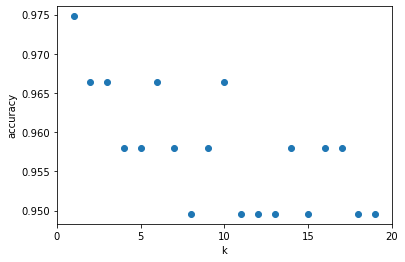

In [64]:
import matplotlib.pyplot as plt
def answer_five():
    k_range = range(1,20)
    accuracy_list = []
    
    for k in k_range:
        
    # Your code here
        X_train, X_test, y_train, y_test = answer_two()
        scaler = StandardScaler()

        columns = X_train.columns
        standardized_X_train = X_train.copy()
        standardized_X_test = X_test.copy()

        standardized_X_train[columns] = scaler.fit_transform(X_train[columns])
        standardized_X_test[columns] = scaler.transform(X_test[columns])
    
        knn = KNeighborsClassifier(n_neighbors = k)
        knn.fit(standardized_X_train, y_train)
        accuracy_list.append(knn.score(standardized_X_test, y_test))
        accuracy = knn.score(standardized_X_test, y_test)
    
    plt.figure()
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.scatter(k_range, accuracy_list)
    plt.xticks([0,5,10,15,20])
    
    return (standardized_X_train, knn, accuracy_list) 


answer_five()